In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
engine = create_engine('postgresql://@localhost/austinolea')
connection = engine.connect()                    

In [3]:
salaries = pd.read_sql('SELECT * FROM salaries', connection)
salaries.head()

salaries_clean = salaries.rename(columns={"emp_no":"Employee Number", "salary": "Salary"})
salaries_clean.head()

,Employee Number,Salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [4]:
titles = pd.read_sql('SELECT * FROM title', connection)
titles.head()

titles_clean = titles.rename(columns={"title_id": "Title ID", "title": "Title",})
titles_clean.head()                                     

,Title ID,Title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [5]:
employees = pd.read_sql('SELECT * FROM employees', connection)
employees.head()

employees_clean = employees.rename(columns={"emp_no":"Employee Number","emp_title_id" : "Title ID", "birth_date": "Birth Date", "first_name" : "First Name", "last_name" : "Last Name", "sex" : "Sex", "hire_date" : "Hire Date"})
employees_clean.head()

,Employee Number,Title ID,Birth Date,First Name,Last Name,Sex,Hire Date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [6]:
merge_1 = pd.merge(titles_clean, employees_clean, on="Title ID", how="inner")
merge_1.head()

,Title ID,Title,Employee Number,Birth Date,First Name,Last Name,Sex,Hire Date
0,s0001,Staff,473302,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,s0001,Staff,421786,1957-09-28,Xiong,Verhoeff,M,1987-11-26
2,s0001,Staff,273487,1957-04-14,Christoph,Parfitt,M,1991-06-28
3,s0001,Staff,246449,1958-03-23,Subbu,Bultermann,F,1988-03-25
4,s0001,Staff,48085,1964-01-19,Venkatesan,Gilg,M,1993-06-28


In [7]:
merge_2 = pd.merge(salaries_clean, merge_1, on='Employee Number', how="inner")
merge_2.head()

,Employee Number,Salary,Title ID,Title,Birth Date,First Name,Last Name,Sex,Hire Date
0,10001,60117,e0003,Senior Engineer,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,65828,s0001,Staff,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,40006,e0003,Senior Engineer,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,40054,e0003,Senior Engineer,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,78228,s0001,Staff,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [11]:
grouped = merge_2.groupby("Title").mean()
grouped

,Employee Number,Salary
Title,,
Assistant Engineer,252992.595373,48564.434447
Engineer,253654.345919,48535.336511
Manager,110780.833333,51531.041667
Senior Engineer,253038.749885,48506.799871
Senior Staff,254481.798969,58550.172704
Staff,253408.503604,58465.382850
Technique Leader,251811.432730,48582.896092


In [40]:
title_salary_df = grouped.drop(columns = "Employee Number")
title_salary_df

,Salary
Title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


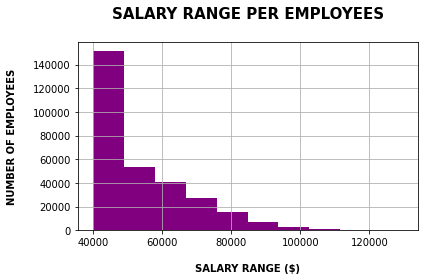

In [43]:
plt.hist(merge_2["Salary"], color='purple', alpha=1);

plt.xlabel("\nSALARY RANGE ($)", weight="bold");
plt.ylabel("NUMBER OF EMPLOYEES\n", weight="bold");
plt.title("SALARY RANGE PER EMPLOYEES\n", weight="bold", size=15)

plt.grid()
plt.tight_layout()

In [41]:
title_salary_df.to_dict()

{'Salary': {'Assistant Engineer': 48564.43444730077,
  'Engineer': 48535.336511426336,
  'Manager': 51531.041666666664,
  'Senior Engineer': 48506.79987109579,
  'Senior Staff': 58550.17270435993,
  'Staff': 58465.38285033152,
  'Technique Leader': 48582.89609189332}}

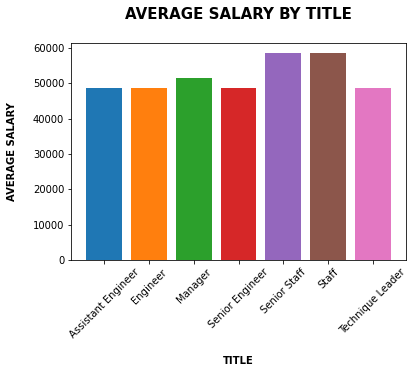

In [39]:
title_salary = {'Assistant Engineer': 48564.43444730077,
  'Engineer': 48535.336511426336,
  'Manager': 51531.041666666664,
  'Senior Engineer': 48506.79987109579,
  'Senior Staff': 58550.17270435993,
  'Staff': 58465.38285033152,
  'Technique Leader': 48582.89609189332}
names = list(title_salary.keys())
values = list(title_salary.values())
plt.bar(0,values[0],tick_label=names[0])
plt.bar(1,values[1],tick_label=names[1])
plt.bar(2,values[2],tick_label=names[2])
plt.bar(3,values[3],tick_label=names[3])
plt.bar(4,values[4],tick_label=names[4])
plt.bar(5,values[5],tick_label=names[5])
plt.bar(6,values[6],tick_label=names[6])
plt.xticks(range(0,7),names, rotation=45)
plt.xlabel("\nTITLE", weight="bold")
plt.ylabel("AVERAGE SALARY\n", weight="bold")
plt.title("AVERAGE SALARY BY TITLE\n", weight="bold", size=15)
plt.show()